## Image Classification using Convolutional Neural Networks
In this analysis, I build a CNN  model to classify aminals based on their images. The data set that I use in this case is a subset of images posted on Kaggle. The subset contains ten thousand images of cats and dogs. I train a CNN model using eight thousand images and validate the model using remaining two thousand images.

In [1]:
# Import libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

### Initialize feature detector
Feature detector is operationalized in order to create layers of feature maps from the input image. Since images are characterized by non-linearity, I use the rectifier activation function in this layer.

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


### Define MaxPooling
By performing MaxPooling, we obtain layers of new feature maps with reduced dimensions.

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Add a second convolutional layer to improve the model performance
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Flattening
This layer flattens all the cells of feature map into a large singe vector which serves as input for the Artificial Neural Networks.

In [6]:
classifier.add(Flatten())

### Add layers to ANN

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compile the model
I design the architecture of the CNN model by choosing "ADAM" stochastic gradient descent algorithm as optimizer, "binary crossentropy" as loss function and "Accuracy" as a performance metric of the fitted model.

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Perform image augmentation and fit CNN
When it comes to fitting a model involving images, it requires significantly lager number of images in order to generalize to correlation with features. In order to minimize the concern of model overfitting in case of images, it is recommended to preprocess the data by image augmentation. Keras library supports such operation. The following sequence of code perform image augmentation and then fit CNN model.

In [9]:
# Import data generator class
from keras.preprocessing.image import ImageDataGenerator

# Create object for preparing image augmentation of the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Create object for preparing image augmentation of the test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Apply image augmentation object on the images of training set and resize the images
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Apply image augmentation object on the images of training set and resize the images
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
# Fit the CNN model
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
8000/8000 [==============================] - 43818s 5s/step - loss: 0.3472 - acc: 0.8342 - val_loss: 0.6603 - val_acc: 0.8025
Epoch 2/25
8000/8000 [==============================] - 3410s 426ms/step - loss: 0.0835 - acc: 0.9692 - val_loss: 1.0504 - val_acc: 0.7860
Epoch 3/25
8000/8000 [==============================] - 2950s 369ms/step - loss: 0.0444 - acc: 0.9845 - val_loss: 1.2945 - val_acc: 0.7890
Epoch 4/25
8000/8000 [==============================] - 3034s 379ms/step - loss: 0.0334 - acc: 0.9887 - val_loss: 1.4135 - val_acc: 0.7886
Epoch 5/25
8000/8000 [==============================] - 2978s 372ms/step - loss: 0.0268 - acc: 0.9909 - val_loss: 1.4098 - val_acc: 0.7922
Epoch 6/25
8000/8000 [==============================] - 2915s 364ms/step - loss: 0.0238 - acc: 0.9924 - val_loss: 1.3342 - val_acc: 0.7976
Epoch 7/25
8000/8000 [==============================] - 2943s 368ms/step - loss: 0.0206 - acc: 0.9933 - val_loss: 1.5363

The accuracy obtained in the training dataset is 99.77% and that in the test data set is 78.99%.

### Make prediction with the fitted model
Now, I feed the image of a cat into the model and let the fitted model predict what animal it is.

In [15]:
# Import packages for displaying
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


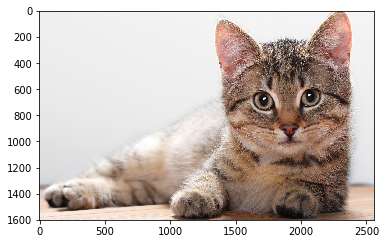

In [16]:
# Read and display the image
img=mpimg.imread('dataset/single_prediction/cat_or_dog_2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
# Now, let the model predict the name of the animal
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("The predicted animal is:", prediction)

The predicted animal is: cat


### Conclusion
In this case, the object is correctly identified. In fact, given 79% accuracy on the test immages, the model is supposed to correctly identify four times in every five cases. A large difference between the accuracy on training images (which is 99.77%) and that on the test images (which is 78.99%) implies that the fitted model is over trained on the training images. Therefore, there are still rooms for improvements so that the fitted model can be generalized on any sets of images for cats and dogs. There can be many different ways that accuracy on the test images can be made closer to the accuracy on training images. Generally this can be achieved by either adding a convolutional layer or by adding a fully connected layer. Since, I have already included two convolutional layers in this model, the best experiment can be to add another fully connected layer in the model. Another practice of increasing the performance is to increase the number of feature detectors in the subsequent convolutional layers (in my model, the number of feature detectors is 32 in every convolutinal layers). However, I will leave those experiements for future explorations.